In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

TSD Outter Loop (100x): 13.3 +/- 2.04
TSD Inner Loop (100x): 0.0104 +/- 0.0194
TSD Outter Loop Rand(100x): 0.046 +/- 0.048
TSD Inner Loop Rand(100x): 0.0126 +/- 0.0195
RGD Loop (100x): 3.4 +/- 1.64


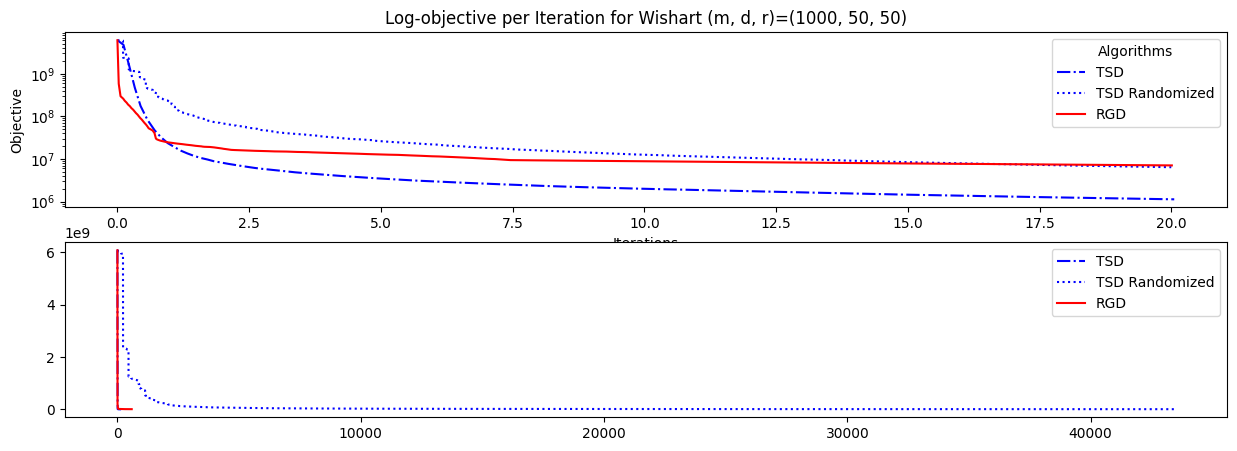

In [18]:
with open('wishart_1000_50_50.json') as f:
    df = json.loads(f.read())

fig, axes = plt.subplots(figsize=[15, 5], ncols=1, nrows=2)

sns.lineplot(y=df['tsd_objective'], x=np.cumsum(df['tsd_time']), label='TSD', ax=axes[0], linestyle='-.', color='b')
sns.lineplot(y=df['tsd_objective_rand'], x=np.cumsum(df['tsd_time_rand']), label='TSD Randomized', ax=axes[0], linestyle=':', color='b')
sns.lineplot(y=df['rgd_objective'], x=np.cumsum(df['rgd_time']), label='RGD', ax=axes[0], color='r')

axes[0].set(yscale="log")
axes[0].legend(title='Algorithms')
axes[0].set_xlabel('Time (seconds)')
axes[0].set_ylabel('Objective')
axes[0].set_title('Log-objective per Time for Wishart (m, d, r)=(1000, 50, 50)');

sns.lineplot(df['tsd_objective'], label='TSD', ax=axes[1], linestyle='-.', color='b')
sns.lineplot(df['tsd_objective_rand'], label='TSD Randomized', ax=axes[1], linestyle=':', color='b')
sns.lineplot(df['rgd_objective'], label='RGD', ax=axes[1], color='r')

axes[0].set(yscale="log")
axes[0].legend(title='Algorithms')
axes[0].set_xlabel('Iterations')
axes[0].set_ylabel('Objective')
axes[0].set_title('Log-objective per Iteration for Wishart (m, d, r)=(1000, 50, 50)');

print(f"TSD Outter Loop (100x): {100*np.mean(df['tsd_time']):.3} +/- {100*np.std(df['tsd_time']):.3}")
print(f"TSD Inner Loop (100x): {100*np.mean(df['tsd_inner_time']):.3} +/- {100*np.std(df['tsd_inner_time']):.3}")
print(f"TSD Outter Loop Rand(100x): {100*np.mean(df['tsd_time_rand']):.3} +/- {100*np.std(df['tsd_time_rand']):.3}")
print(f"TSD Inner Loop Rand(100x): {100*np.mean(df['tsd_inner_time_rand']):.3} +/- {100*np.std(df['tsd_inner_time_rand']):.3}")
print(f"RGD Loop (100x): {100*np.mean(df['rgd_time']):.3} +/- {100*np.std(df['rgd_time']):.3}")

TSD Outter Loop (100x): 13.6 +/- 1.85
TSD Inner Loop (100x): 0.0106 +/- 0.0156
TSD Outter Loop Rand(100x): 0.0472 +/- 0.041
TSD Inner Loop Rand(100x): 0.013 +/- 0.0225
RGD Loop (100x): 10.7 +/- 12.4


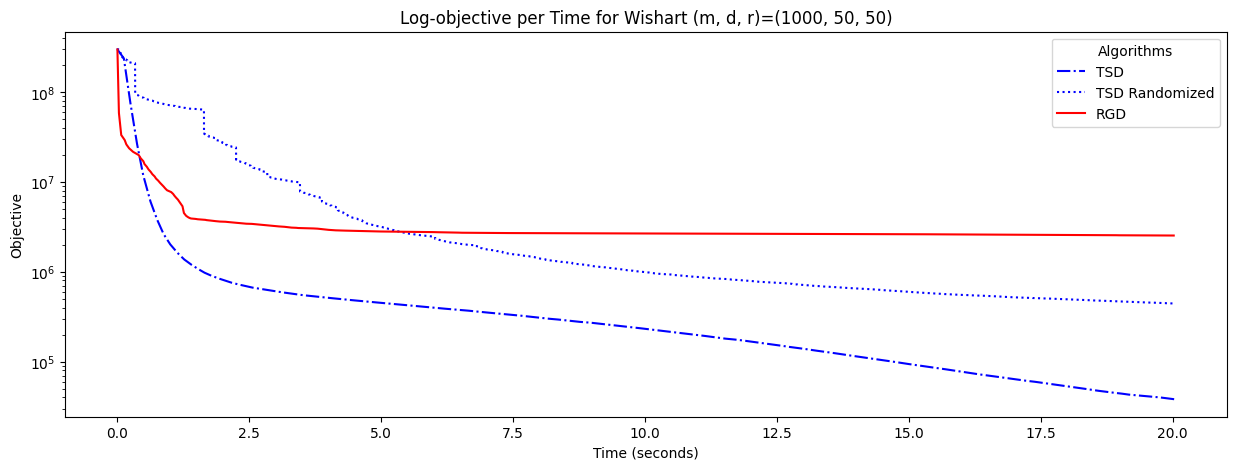

In [12]:
with open('wishart_1000_50_10.json') as f:
    df = json.loads(f.read())

fig, axes = plt.subplots(figsize=[15, 5], ncols=1, nrows=2)

sns.lineplot(y=df['tsd_objective'], x=np.cumsum(df['tsd_time']), label='TSD', ax=axes[0], linestyle='-.', color='b')
sns.lineplot(y=df['tsd_objective_rand'], x=np.cumsum(df['tsd_time_rand']), label='TSD Randomized', ax=axes[0], linestyle=':', color='b')
sns.lineplot(y=df['rgd_objective'], x=np.cumsum(df['rgd_time']), label='RGD', ax=axes[0], color='r')

axes[0].set(yscale="log")
axes[0].legend(title='Algorithms')
axes[0].set_xlabel('Time (seconds)')
axes[0].set_ylabel('Objective')
axes[0].set_title('Log-objective per Time for Wishart (m, d, r)=(1000, 50, 10)');

sns.lineplot(df['tsd_objective'], label='TSD', ax=axes[1], linestyle='-.', color='b')
sns.lineplot(df['tsd_objective_rand'], label='TSD Randomized', ax=axes[1], linestyle=':', color='b')
sns.lineplot(df['rgd_objective'], label='RGD', ax=axes[1], color='r')

axes[0].set(yscale="log")
axes[0].legend(title='Algorithms')
axes[0].set_xlabel('Iterations')
axes[0].set_ylabel('Objective')
axes[0].set_title('Log-objective per Iteration for Wishart (m, d, r)=(1000, 50, 10)');

print(f"TSD Outter Loop (100x): {100*np.mean(df['tsd_time']):.3} +/- {100*np.std(df['tsd_time']):.3}")
print(f"TSD Inner Loop (100x): {100*np.mean(df['tsd_inner_time']):.3} +/- {100*np.std(df['tsd_inner_time']):.3}")
print(f"TSD Outter Loop Rand(100x): {100*np.mean(df['tsd_time_rand']):.3} +/- {100*np.std(df['tsd_time_rand']):.3}")
print(f"TSD Inner Loop Rand(100x): {100*np.mean(df['tsd_inner_time_rand']):.3} +/- {100*np.std(df['tsd_inner_time_rand']):.3}")
print(f"RGD Loop (100x): {100*np.mean(df['rgd_time']):.3} +/- {100*np.std(df['rgd_time']):.3}")